# Dealing with Multiclass Data: Covertype Prediction
This notebook outlines the following tree-based and bagging methods: 
- Decision Trees (out of the box and via gridsearchcv + randomsearch) 
- Random Forests (out of the box and via gridsearchcv + randomsearch)

Notebook Updates 08/04/19: 
- fixed imports 
- removed decision tree feature importance
- training set accuracy plot - decision tree + random forest 
- feature names in feature importance plots 
- RF accuracy description discussed in blog post https://docs.google.com/document/d/1B4FtuwTO2yYqGTVqbbB9iZd0cpTds4SZ_5GGth4GDj0/edit# 
- model stacking from classes 1 & 2 --> working

In [3]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from pprint import pprint


from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix
import sklearn.model_selection as model_selection

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from random import sample

from sklearn import preprocessing

from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from collections import Counter


from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
 

from sklearn import tree
import pydotplus
print(__doc__)

Using TensorFlow backend.


Automatically created module for IPython interactive environment


In [4]:
import os
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts'

In [6]:
os.chdir('/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts')
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts'

In [7]:
data = open("covtype.data")
data = pd.read_csv("covtype.data", header=None)

## Exploratory Data Analysis

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [9]:
# set column names 
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1',
        'Soil_Type_2',
        'Soil_Type_3',
        'Soil_Type_4',
        'Soil_Type_5',
        'Soil_Type_6',
        'Soil_Type_7',
        'Soil_Type_8',
        'Soil_Type_9',
        'Soil_Type_10',
        'Soil_Type_11',
        'Soil_Type_12',
        'Soil_Type_13',
        'Soil_Type_14',
        'Soil_Type_15',
        'Soil_Type_16',
        'Soil_Type_17',
        'Soil_Type_18',
        'Soil_Type_19',
        'Soil_Type_20',
        'Soil_Type_21',
        'Soil_Type_22',
        'Soil_Type_23',
        'Soil_Type_24',
        'Soil_Type_25',
        'Soil_Type_26',
        'Soil_Type_27',
        'Soil_Type_28',
        'Soil_Type_29',
        'Soil_Type_30',
        'Soil_Type_31',
        'Soil_Type_32',
        'Soil_Type_33',
        'Soil_Type_34',
        'Soil_Type_35',
        'Soil_Type_36',
        'Soil_Type_37',
        'Soil_Type_38',
        'Soil_Type_39',
        'Soil_Type_40', 
       'Cover_Type']
#cols

In [10]:
data.columns = cols
data.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [11]:
data.shape

(581012, 55)

In [12]:
data.describe()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [13]:
#plotting multiple binary categorical variables?
data.groupby('Cover_Type').describe()

elevation                                                    \
               count         mean         std     min      25%     50%   
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

                              aspect              ... Soil_Type_39       \
               75%     max     count        mean  ...          75%  max   
Cover_Type                                        ...                     
1           3235.0  3686.0  211840.0  156.138227  ...          0.0  1.0   
2           3042.0  3433.0  283301.0  152.060515  ...          0.0  1.0   
3           2549.0  2899.0   35754.0  176.372490  ...          0.0  0.0   
4           2304.0  2526.0    2747.0  137.139425  ...          0.0  0.0   
5           2857.0  3011.0    9493.0  139.283051  ...          0.0  0.0   
6           2544.0  2900.0   17367.0  180.539068  ...          0.0  0.0   
7           3409.0  3858.0   20510.0  153.236226  ...          1.0  1.0   

           Soil_Type_40                                               
                  count      mean       std  min  25%  50%  75%  max  
Cover_Type                                                            
1              211840.0  0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2              283301.0  0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3               35754.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4                2747.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5                9493.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6               17367.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7               20510.0  0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [14]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(data['Cover_Type'])
cov_dummy.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0


In [15]:
df4 = pd.concat([cov_dummy, data], axis = 1)
df4.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0,0,0,0,1,0,0,2596,51,3,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,1,0,0,2590,56,2,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,2804,139,9,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,2785,155,18,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,2595,45,2,...,0,0,0,0,0,0,0,0,0,5


In [16]:
df4_column_names = list(df4.columns)
df4_column_names.remove('Cover_Type')
df4_column_names

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 'elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Wilderness_Area_4',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Typ

In [17]:
# Normalize all columns

x = df4.loc[:, df4.columns != 'Cover_Type'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df4_column_names)
#df_normalized.loc[:,:] = x_scaled

In [18]:
df_normalized.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368684,0.141667,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.365683,0.155556,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.472736,0.386111,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463232,0.430556,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368184,0.125000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#append Y axis babck to this 
df_normalized_w_target = pd.concat([df_normalized, df4['Cover_Type']], axis=1)
df_normalized_w_target.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368684,0.141667,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.365683,0.155556,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.472736,0.386111,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463232,0.430556,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368184,0.125000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [20]:
df_normalized_w_target.shape

(581012, 62)

In [21]:
df_dummy = df_normalized_w_target
df_dummy = df_dummy.drop(['Cover_Type'], axis=1)
df_dummy.head()

,1,2,3,4,5,6,7,elevation,aspect,slope,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368684,0.141667,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.365683,0.155556,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.472736,0.386111,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.463232,0.430556,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.368184,0.125000,0.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
RANDOM_STATE = 42

In [23]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[7:-1]]
print(X.shape)
X.head()

(581012, 54)


,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()
#Y

(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [25]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 2700, 2: 2700, 3: 2700, 4:2700, 5:2700, 6:2700, 7:2700},
                      random_state=RANDOM_STATE)

In [26]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [27]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({7: 2051, 1: 2037, 6: 2030, 2: 2027, 4: 2017, 5: 2016, 3: 1997})
Testing target statistics: Counter({3: 703, 5: 684, 4: 683, 2: 673, 6: 670, 1: 663, 7: 649})


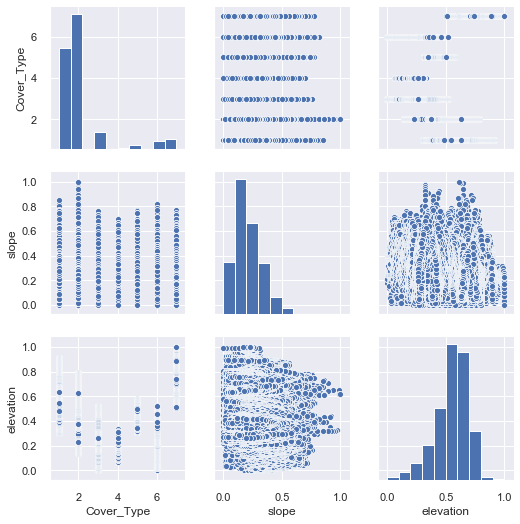

In [28]:
sns.set()
cols2 = ['Cover_Type', 'slope', 'elevation']
sns.pairplot(df_normalized_w_target[cols2], size = 2.5)
plt.show();

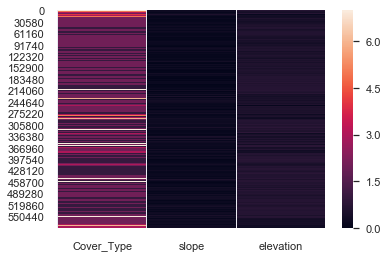

In [29]:
sns.heatmap(df_normalized_w_target[cols2])

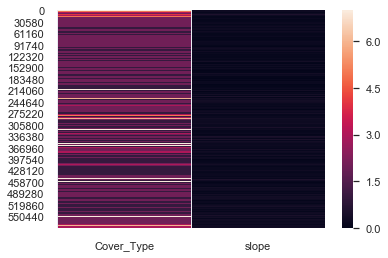

In [30]:
cols3 = ['Cover_Type', 'slope']
sns.heatmap(df_normalized_w_target[cols3])

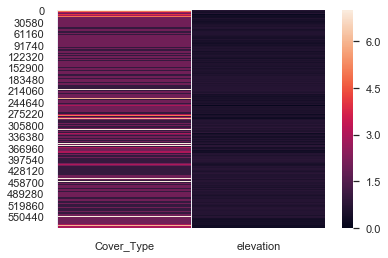

In [31]:
cols4 = ['Cover_Type', 'elevation']
sns.heatmap(df_normalized_w_target[cols4])

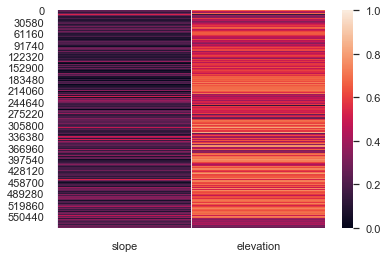

In [32]:
cols5 = ['slope', 'elevation']
sns.heatmap(df_normalized_w_target[cols5])

## Decision Tree

In [33]:
clf = DecisionTreeClassifier(random_state=42)

In [34]:
clf = clf.fit(X_train, y_train)

In [35]:
dtree = DecisionTreeClassifier( random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

### Decision Tree Model Performance

In [36]:
predictions = dtree.predict(X_test)

In [37]:

#this is for all the variables
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.7993650793650794


In [38]:
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.80


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.69      0.67      0.68       663
           2       0.66      0.62      0.64       673
           3       0.78      0.76      0.77       703
           4       0.93      0.93      0.93       683
           5       0.86      0.92      0.89       684
           6       0.77      0.77      0.77       670
           7       0.90      0.92      0.91       649

    accuracy                           0.80      4725
   macro avg       0.80      0.80      0.80      4725
weighted avg       0.80      0.80      0.80      4725



In [40]:
print(confusion_matrix(y_test,predictions))

[[446 144   1   0  11   3  58]
 [141 418  20   0  65  17  12]
 [  0  22 535  25  12 109   0]
 [  0   0  31 633   0  19   0]
 [  9  23  12   0 632   8   0]
 [  4  21  91  26  12 516   0]
 [ 47   5   0   0   0   0 597]]


In [41]:
feature_list = list(df_normalized_w_target.columns)[7:-1]

features = list(feature_list)
features

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Wilderness_Area_4',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_40']

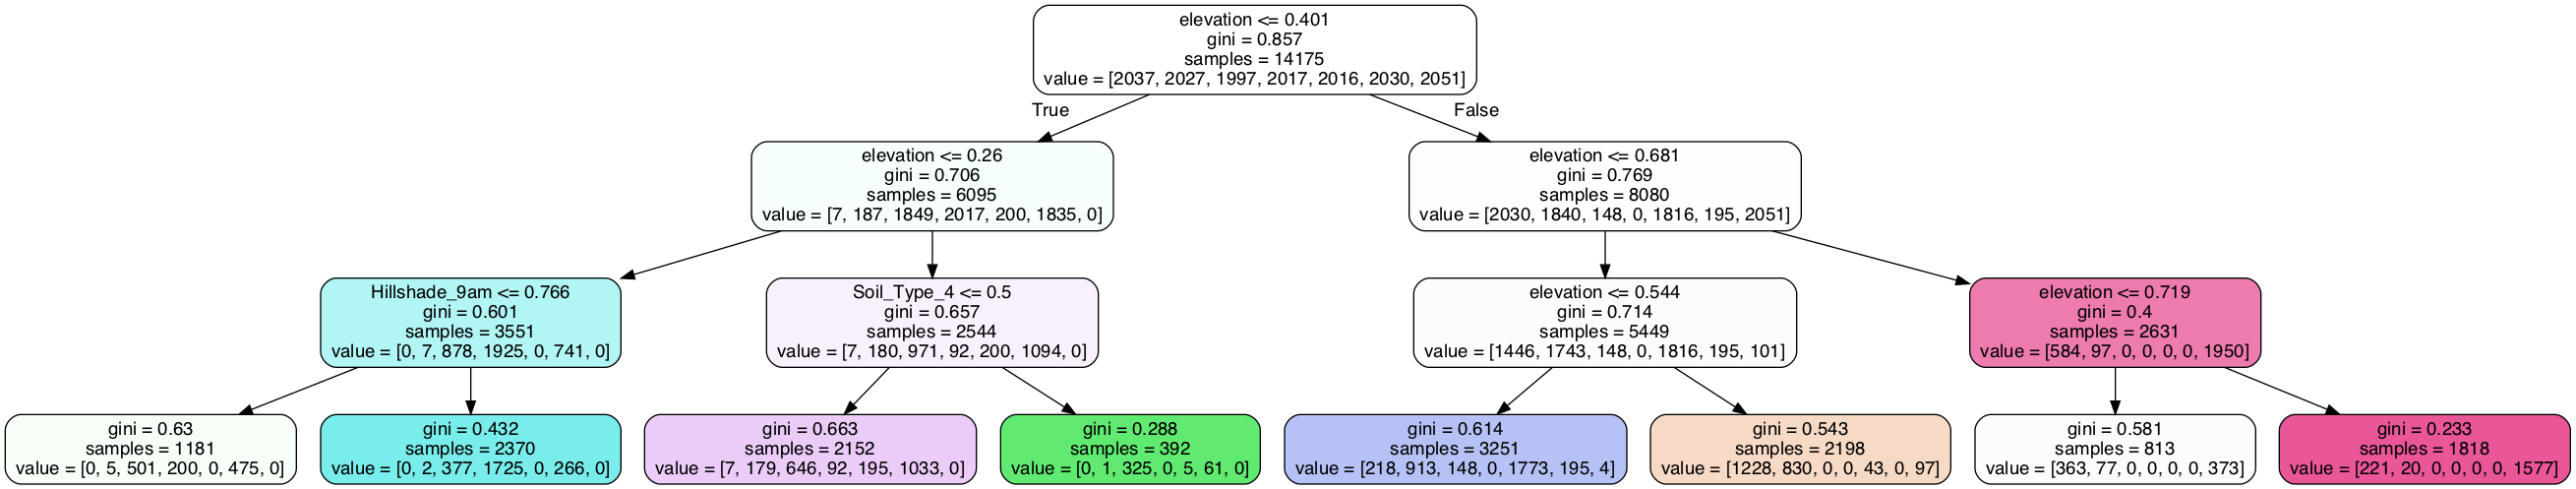

In [42]:
dtree_baseline = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_baseline.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(dtree_baseline, out_file=dot_data,feature_names=features,filled=True,rounded=True)
 
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#note: double click the image to expand it 

In [43]:
print ("Decision Tree Train Accuracy Baseline:", metrics.accuracy_score(y_train, dtree_baseline.predict(X_train)))
print ("Decision Tree Test Accuracy Baseline:", metrics.accuracy_score(y_test, dtree_baseline.predict(X_test)))

Decision Tree Train Accuracy Baseline: 0.6021164021164022
Decision Tree Test Accuracy Baseline: 0.5968253968253968


Testing Accuracy < Training Accuracy = overfitting; but note that the above is lower than if max_depth was not set

Text(0, 0.5, 'Accuracy Rate')

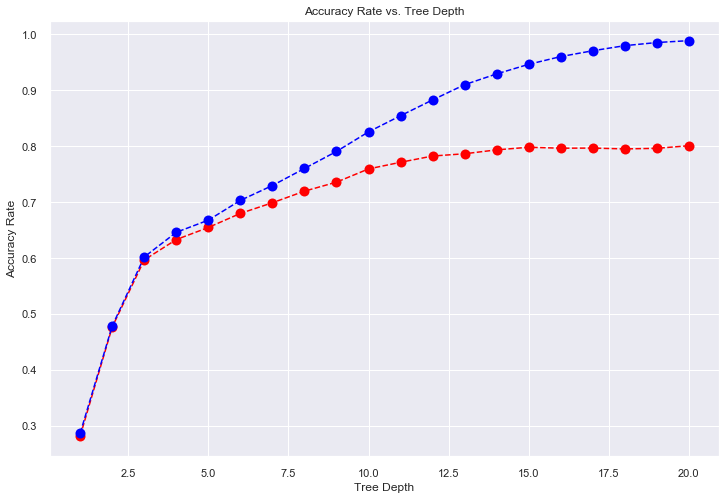

In [44]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    training_acc.append(dtree.score(X_train, y_train))


plt.figure(figsize=(12,8))
#plt.plot(range(1,200),accuracy_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,21), accuracy_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(np.arange(1,21), training_acc,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

#blue - trianing accuracy 
# red - testing accuracyy 

## Random Forest - Baseline

In [45]:

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
rfc_pred = rfc.predict(X_test)

### Random Forest Model Performance

In [47]:
y_pred =  rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baselsine:", metrics.accuracy_score(y_test, rfc.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline: 1.0
Random Forest Test Accuracy Baselsine: 0.8651851851851852


In [48]:
print(confusion_matrix(y_test,rfc_pred))

[[518  85   0   0  11   0  49]
 [127 458  15   0  44  23   6]
 [  0   3 575  35   9  81   0]
 [  0   0  12 660   0  11   0]
 [  0  12  15   0 655   2   0]
 [  0   5  49  26   2 588   0]
 [ 15   0   0   0   0   0 634]]


In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78       663
           2       0.81      0.68      0.74       673
           3       0.86      0.82      0.84       703
           4       0.92      0.97      0.94       683
           5       0.91      0.96      0.93       684
           6       0.83      0.88      0.86       670
           7       0.92      0.98      0.95       649

    accuracy                           0.87      4725
   macro avg       0.86      0.87      0.86      4725
weighted avg       0.86      0.87      0.86      4725



## Feature Selection - Random Forest

In [50]:
from sklearn import inspection
import mlxtend

from mlxtend.evaluate import feature_importance_permutation

In [51]:
importance_vals = rfc.feature_importances_
print(importance_vals)

[2.24433999e-01 4.88135230e-02 3.66608911e-02 6.40612231e-02
 5.36613098e-02 9.09090343e-02 5.14952208e-02 4.55604327e-02
 4.55645161e-02 7.33401083e-02 1.57427393e-02 3.18343717e-03
 1.65097091e-02 4.61284191e-02 1.77032242e-03 7.54943175e-03
 2.21456247e-02 1.24020807e-02 1.23442772e-03 3.31163323e-03
 1.51138343e-05 5.42006472e-05 8.42155137e-05 2.12219453e-02
 2.99666458e-03 5.69166848e-03 5.56612376e-03 6.16782758e-04
 2.26328115e-05 7.62458713e-04 6.39643185e-03 9.34563295e-04
 4.66281781e-04 1.34612380e-03 1.91876594e-04 6.06410478e-03
 5.12080613e-03 2.19199891e-03 6.61097346e-05 4.35050888e-04
 2.20351427e-04 2.00461164e-04 5.11797778e-03 8.49815280e-03
 2.49354272e-03 4.21726243e-03 3.64476615e-03 4.76859795e-04
 2.01348101e-03 7.89240690e-05 5.61637045e-04 1.96245967e-02
 1.91321716e-02 8.99657764e-03]


In [52]:
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importance_vals)[::-1]

In [53]:
#feature_list
#feature_list.sort(key=indices)
#feature_list.iloc[indices]
#feature_list.ix[indices]
ranked_index = [feature_list[i] for i in indices]
#range(X.shape[1])

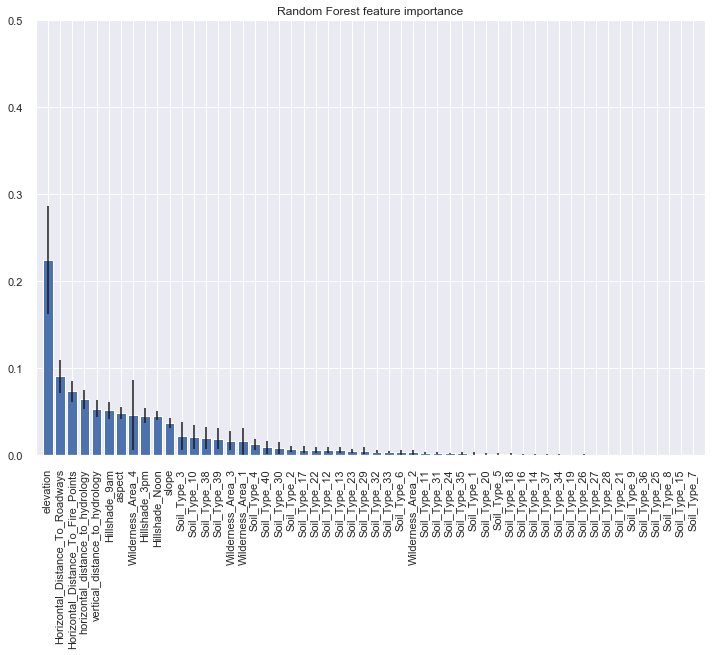

In [54]:
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Random Forest feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices],
        yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xticks(range(X.shape[1]), (ranked_index), rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.5])
plt.show()

#feature_list = list(df_normalized_w_target.columns)[7:-1]

In [55]:
# Permutation Importance 
imp_vals, _ = feature_importance_permutation(
    predict_method=rfc.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=1,
    seed=42)

imp_vals

array([ 3.20634921e-01,  1.01587302e-02,  5.71428571e-03,  4.04232804e-02,
        1.65079365e-02,  8.29629630e-02,  8.04232804e-03,  1.75661376e-02,
        5.29100529e-03,  6.51851852e-02,  1.22751323e-02,  6.34920635e-04,
        1.37566138e-02,  2.45502646e-02,  2.11640212e-04,  4.44444444e-03,
        1.58730159e-02,  6.56084656e-03,  6.34920635e-04,  2.53968254e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.18518519e-02,
        6.34920635e-04, -6.34920635e-04,  1.48148148e-03,  4.23280423e-04,
        0.00000000e+00,  4.23280423e-04,  2.11640212e-03, -2.11640212e-04,
        0.00000000e+00,  1.05820106e-03,  2.11640212e-04,  3.17460317e-03,
        1.69312169e-03,  1.26984127e-03,  2.11640212e-04,  2.11640212e-04,
        0.00000000e+00,  2.11640212e-04,  3.59788360e-03,  4.23280423e-03,
        1.69312169e-03,  3.80952381e-03,  0.00000000e+00,  0.00000000e+00,
        6.34920635e-04,  0.00000000e+00,  0.00000000e+00,  9.52380952e-03,
        1.03703704e-02,  

In [56]:
imp_vals, imp_all = feature_importance_permutation(
    predict_method=rfc.predict, 
    X=X_test,
    y=y_test,
    metric='accuracy',
    num_rounds=10,
    seed=42)
#imp_vals, imp_all

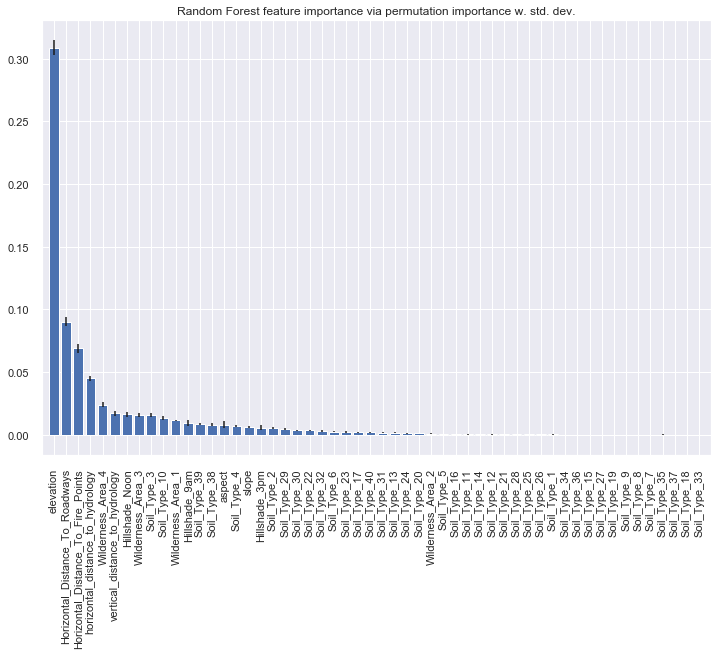

In [57]:
std = np.std(imp_all, axis=1)
indices = np.argsort(imp_vals)[::-1]
ranked_index_2 = [feature_list[i] for i in indices]


plt.figure(figsize=(12,8))
plt.title("Random Forest feature importance via permutation importance w. std. dev.")
plt.bar(range(X.shape[1]), imp_vals[indices],
        yerr=std[indices])
#plt.xticks(range(X.shape[1]), indices)
plt.xticks(range(X.shape[1]), (ranked_index_2), rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [58]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[7:-1]]
print(X.shape)
X.head()

(581012, 54)


,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#perm_feat_imp = X.iloc[0,5,9,3,12,13,4,23,7,10]
#perm_feat_imp = X[X.columns[0]]
perm_feat_imp = X.iloc[:,[0,5,9,3,12,13,4,23,7,10]]
perm_feat_imp.head()

,elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,horizontal_distance_to_hydrology,Wilderness_Area_3,Wilderness_Area_4,vertical_distance_to_hydrology,Soil_Type_10,Hillshade_Noon,Wilderness_Area_1
0,0.368684,0.071659,0.875366,0.184681,0.0,0.0,0.223514,0.0,0.913386,1.0
1,0.365683,0.054798,0.867838,0.151754,0.0,0.0,0.215762,0.0,0.925197,1.0
2,0.472736,0.446817,0.853339,0.191840,0.0,0.0,0.307494,0.0,0.937008,1.0
3,0.463232,0.434172,0.865886,0.173228,0.0,0.0,0.375969,0.0,0.937008,1.0
4,0.368184,0.054939,0.860449,0.109520,0.0,0.0,0.222222,0.0,0.921260,1.0


### Retrain Random Forest

In [60]:
X, y = make_imbalance(perm_feat_imp, Y,
                      sampling_strategy={1: 2700, 2: 2700, 3: 2700, 4:2700, 5:2700, 6:2700, 7:2700},
                      random_state=RANDOM_STATE)

In [61]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [62]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({7: 2051, 1: 2037, 6: 2030, 2: 2027, 4: 2017, 5: 2016, 3: 1997})
Testing target statistics: Counter({3: 703, 5: 684, 4: 683, 2: 673, 6: 670, 1: 663, 7: 649})


In [63]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
rfc_pred = rfc.predict(X_test)

y_pred =  rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline After PFS:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After PFS:", metrics.accuracy_score(y_test, rfc.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline After PFS: 1.0
Random Forest Test Accuracy Baseline After PFS: 0.8539682539682539


Accuracy decreased byy about 0.9%, so now we want to add features back until it increases.

In [65]:
print(confusion_matrix(y_test,rfc_pred))

[[482  98   1   0  11   0  71]
 [116 454  21   1  56  19   6]
 [  0   5 581  23  14  80   0]
 [  0   0  16 661   0   6   0]
 [  1  11  15   0 654   3   0]
 [  0   7  52  25  10 576   0]
 [ 20   1   0   0   1   0 627]]


In [66]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.78      0.73      0.75       663
           2       0.79      0.67      0.73       673
           3       0.85      0.83      0.84       703
           4       0.93      0.97      0.95       683
           5       0.88      0.96      0.91       684
           6       0.84      0.86      0.85       670
           7       0.89      0.97      0.93       649

    accuracy                           0.85      4725
   macro avg       0.85      0.85      0.85      4725
weighted avg       0.85      0.85      0.85      4725



In [67]:
X=df_normalized_w_target[list(df_normalized_w_target.columns)[7:-1]]
perm_feat_imp = X.iloc[:,[0,5,9,3,12,13,4,23,7,10,16,6,52]]
perm_feat_imp.head()

,elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,horizontal_distance_to_hydrology,Wilderness_Area_3,Wilderness_Area_4,vertical_distance_to_hydrology,Soil_Type_10,Hillshade_Noon,Wilderness_Area_1,Soil_Type_3,Hillshade_9am,Soil_Type_39
0,0.368684,0.071659,0.875366,0.184681,0.0,0.0,0.223514,0.0,0.913386,1.0,0.0,0.870079,0.0
1,0.365683,0.054798,0.867838,0.151754,0.0,0.0,0.215762,0.0,0.925197,1.0,0.0,0.866142,0.0
2,0.472736,0.446817,0.853339,0.191840,0.0,0.0,0.307494,0.0,0.937008,1.0,0.0,0.921260,0.0
3,0.463232,0.434172,0.865886,0.173228,0.0,0.0,0.375969,0.0,0.937008,1.0,0.0,0.937008,0.0
4,0.368184,0.054939,0.860449,0.109520,0.0,0.0,0.222222,0.0,0.921260,1.0,0.0,0.866142,0.0


In [68]:
X, y = make_imbalance(perm_feat_imp, Y,
                      sampling_strategy={1: 2700, 2: 2700, 3: 2700, 4:2700, 5:2700, 6:2700, 7:2700},
                      random_state=RANDOM_STATE)

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [69]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
rfc_pred = rfc.predict(X_test)

y_pred =  rfc.predict(X_test)
print ("Random Forest Train Accuracy Baseline After PFS and addition of features:", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After PFS and addition of features:", metrics.accuracy_score(y_test, rfc.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline After PFS and addition of features: 1.0
Random Forest Test Accuracy Baseline After PFS and addition of features: 0.8637037037037038


In [71]:
print(confusion_matrix(y_test,rfc_pred))

[[496  96   1   0   7   0  63]
 [120 453  16   0  52  26   6]
 [  0   4 588  24  14  73   0]
 [  0   0  15 658   0  10   0]
 [  0  10  12   0 659   3   0]
 [  0   5  38  23   6 598   0]
 [ 20   0   0   0   0   0 629]]


In [73]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.78      0.75      0.76       663
           2       0.80      0.67      0.73       673
           3       0.88      0.84      0.86       703
           4       0.93      0.96      0.95       683
           5       0.89      0.96      0.93       684
           6       0.84      0.89      0.87       670
           7       0.90      0.97      0.93       649

    accuracy                           0.86      4725
   macro avg       0.86      0.86      0.86      4725
weighted avg       0.86      0.86      0.86      4725



Accuracy rate is back at 86%, so we can now just keep the top 13 features. 

## Hyperparameter Tuning - Random Forest

In [74]:
# Random forest baseline performance
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [76]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15, 20, None],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'min_samples_split': [2, 30, 40],
}
param_grid


{'bootstrap': [True],
 'max_depth': [10, 15, 20, None],
 'min_samples_leaf': [1, 10, 20, 50, 100],
 'min_samples_split': [2, 30, 40]}

In [77]:
# Create a based model
rfc_gs = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc_gs, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [78]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    6.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [79]:
grid_search.best_params_
#still kind of out of the box

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [80]:
best_grid = grid_search.best_estimator_
best_grid



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
optimal_param_grid = {
    'bootstrap': [True],
    'max_depth': [20], #setting this so as not to create a tree that's too big
    #'max_features': [2, 3, 4, 10],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    #'n_estimators': [17]
}

In [82]:
grid_search = GridSearchCV(estimator = rfc, param_grid = optimal_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [83]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [84]:
rfc_pred_gs = grid_search.predict(X_test)

y_pred_gs =  grid_search.predict(X_test)
print ("Random Forest Train Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_train, grid_search.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After Grid Search:", metrics.accuracy_score(y_test, grid_search.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline After Grid Search: 0.9928747795414462
Random Forest Test Accuracy Baseline After Grid Search: 0.8404232804232804


* the test accuracy went from 86% to 84% --> why?

In [85]:
# Create the parameter grid based on the results of random search 
n_param_grid = {
    'bootstrap': [True],
    'max_depth': [20], #setting this so as not to create a tree that's too big
    #'max_features': [2, 3, 4, 10],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [10, 20, 100, 200, 300, 400]
}
n_param_grid

{'bootstrap': [True],
 'max_depth': [20],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [10, 20, 100, 200, 300, 400]}

In [86]:
# Create a based model
n_rfc_gs = RandomForestClassifier()
# Instantiate the grid search model
n_grid_search = GridSearchCV(estimator = n_rfc_gs, param_grid = n_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [87]:
# Fit the grid search to the data
n_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    6.8s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   10.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [88]:
n_grid_search.best_params_
#still kind of out of the box

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [89]:
n_best_grid = n_grid_search.best_estimator_

n_optimal_param_grid = {
    'bootstrap': [True],
    'max_depth': [20], #setting this so as not to create a tree that's too big
    #'max_features': [2, 3, 4, 10],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [300]
}

nn_grid_search = GridSearchCV(estimator = n_rfc_gs, param_grid = n_optimal_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [90]:
nn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [91]:
nn_rfc_pred_gs = nn_grid_search.predict(X_test)

nn_y_pred_gs =  nn_grid_search.predict(X_test)
print ("Random Forest Train Accuracy Baseline After Grid Search and N-estimators Search:", metrics.accuracy_score(y_train, nn_grid_search.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After Grid Search and N-estimators Search:", metrics.accuracy_score(y_test, nn_grid_search.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline After Grid Search and N-estimators Search: 0.9997883597883598
Random Forest Test Accuracy Baseline After Grid Search and N-estimators Search: 0.8628571428571429


Text(0, 0.5, 'Accuracy Rate')

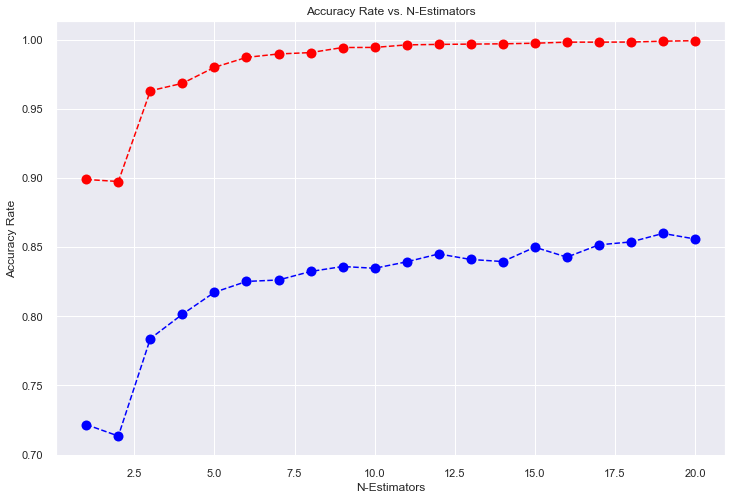

In [92]:
accuracy_rate = []
training_acc = []

for i in range(1,21):   
    rfc_plot = RandomForestClassifier(bootstrap=True,
                       max_depth=None, 
                       min_samples_leaf=1, min_samples_split=2,
                       n_estimators=i)
    rfc_plot.fit(X_train, y_train) 
    accuracy_rate.append(rfc_plot.score(X_test, y_test))
    training_acc.append(rfc_plot.score(X_train, y_train))
    
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,21), accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(np.arange(1,21), training_acc,color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

#training > testing
plt.title('Accuracy Rate vs. N-Estimators')
plt.xlabel('N-Estimators')
plt.ylabel('Accuracy Rate')

In [93]:
nest_optimal_param_grid = {
    'bootstrap': [True],
    'max_depth': [20], #setting this so as not to create a tree that's too big
    #'max_features': [2, 3, 4, 10],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [40]
}

nnest_grid_search = GridSearchCV(estimator = n_rfc_gs, param_grid = nest_optimal_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [94]:
nnest_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [95]:
nnest_rfc_pred_gs = nnest_grid_search.predict(X_test)

nnest_y_pred_gs =  nnest_grid_search.predict(X_test)
print ("Random Forest Train Accuracy Baseline After Grid Search Final N-estimators Search:", metrics.accuracy_score(y_train, nnest_grid_search.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After Grid Search Final N-estimators Search:", metrics.accuracy_score(y_test, nnest_grid_search.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline After Grid Search Final N-estimators Search: 0.9983774250440917
Random Forest Test Accuracy Baseline After Grid Search Final N-estimators Search: 0.855026455026455


## Model Evaluation

In [96]:
nnest_rfc_pred_gs = nnest_grid_search.predict(X_test)

nnest_y_pred_gs =  nnest_grid_search.predict(X_test)
print ("Random Forest Train Accuracy Baseline After Grid Search Final N-estimators Search:", metrics.accuracy_score(y_train, nnest_grid_search.predict(X_train)))
print ("Random Forest Test Accuracy Baseline After Grid Search Final N-estimators Search:", metrics.accuracy_score(y_test, nnest_grid_search.predict(X_test)))
#print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Random Forest Train Accuracy Baseline After Grid Search Final N-estimators Search: 0.9983774250440917
Random Forest Test Accuracy Baseline After Grid Search Final N-estimators Search: 0.855026455026455


**Test Set Accuracy: 86% > Random Guessing = 1/7 =14%.**

In [97]:
print(confusion_matrix(y_test,nnest_y_pred_gs))

[[498  95   0   0  11   0  59]
 [122 441  19   0  63  22   6]
 [  1   4 570  27  16  85   0]
 [  0   0  16 659   0   8   0]
 [  0  11  12   0 657   4   0]
 [  1   4  46  25   9 585   0]
 [ 16   2   0   0   1   0 630]]


**How accurate does the model need to be to generate revenue for the business?**

## Pushing Further

In [98]:
print(df_dummy.columns)
numerical_cols = df_dummy.iloc[:, 7:17]
numerical_cols.head()
#numeric_cols = data._get_numeric_data().columns
#numeric_cols = 
#this doesn't seem to be working 
#data.head()

#categorical_cols = 

Index([                                   1,
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                'elevation',
                                   'aspect',
                                    'slope',
         'horizontal_distance_to_hydrology',
           'vertical_distance_to_hydrology',
          'Horizontal_Distance_To_Roadways',
                            'Hillshade_9am',
                           'Hillshade_Noon',
                            'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points',
                        'Wilderness_Area_1',
                        'Wilderness_Area_2',
                        'Wilderness_Area_3',
                        'Wilderness_Area_4',
                              'Soil_Type_1',
          

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,0.368684,0.141667,0.045455,0.184681,0.223514,0.071659,0.870079,0.913386,0.582677,0.875366
1,0.365683,0.155556,0.030303,0.151754,0.215762,0.054798,0.866142,0.925197,0.594488,0.867838
2,0.472736,0.386111,0.136364,0.191840,0.307494,0.446817,0.921260,0.937008,0.531496,0.853339
3,0.463232,0.430556,0.272727,0.173228,0.375969,0.434172,0.937008,0.937008,0.480315,0.865886
4,0.368184,0.125000,0.030303,0.109520,0.222222,0.054939,0.866142,0.921260,0.590551,0.860449


In [99]:
categorical_cols = df_dummy.loc[:, 'Wilderness_Area_1':'Soil_Type_40']
categorical_cols.head()

,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
#include Y value 
#y_numerical_cols = df_dummy.ix[:,[0, 15:45]]
#cov_type = data.loc['Cover_Type']
#cov_type
#y_numerical_cols = numerical_cols.join(df_dummy[0])
#y_numerical_cols.head()
y_numerical_cols = data.iloc[:, 0:10]
y_numerical_cols.head()
num_wi_target = y_numerical_cols.join(data.iloc[:, -1])
num_wi_target.head()

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5


In [101]:
# Correlation Matrix 

#plt.matshow(data.corr())
#plt.show()

corr = num_wi_target.corr()
#corr.style.background_gradient(cmap='coolwarm')
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(1)

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
elevation,1,0.02,-0.2,0.3,0.09,0.4,0.1,0.2,0.06,0.1,-0.3
aspect,0.02,1,0.08,0.02,0.07,0.03,-0.6,0.3,0.6,-0.1,0.02
slope,-0.2,0.08,1,-0.01,0.3,-0.2,-0.3,-0.5,-0.2,-0.2,0.1
horizontal_distance_to_hydrology,0.3,0.02,-0.01,1,0.6,0.07,-0.03,0.05,0.05,0.05,-0.02
vertical_distance_to_hydrology,0.09,0.07,0.3,0.6,1,-0.05,-0.2,-0.1,0.03,-0.07,0.08
Horizontal_Distance_To_Roadways,0.4,0.03,-0.2,0.07,-0.05,1,0.03,0.2,0.1,0.3,-0.2
Hillshade_9am,0.1,-0.6,-0.3,-0.03,-0.2,0.03,1,0.01,-0.8,0.1,-0.04
Hillshade_Noon,0.2,0.3,-0.5,0.05,-0.1,0.2,0.01,1,0.6,0.06,-0.1
Hillshade_3pm,0.06,0.6,-0.2,0.05,0.03,0.1,-0.8,0.6,1,-0.05,-0.05
Horizontal_Distance_To_Fire_Points,0.1,-0.1,-0.2,0.05,-0.07,0.3,0.1,0.06,-0.05,1,-0.1


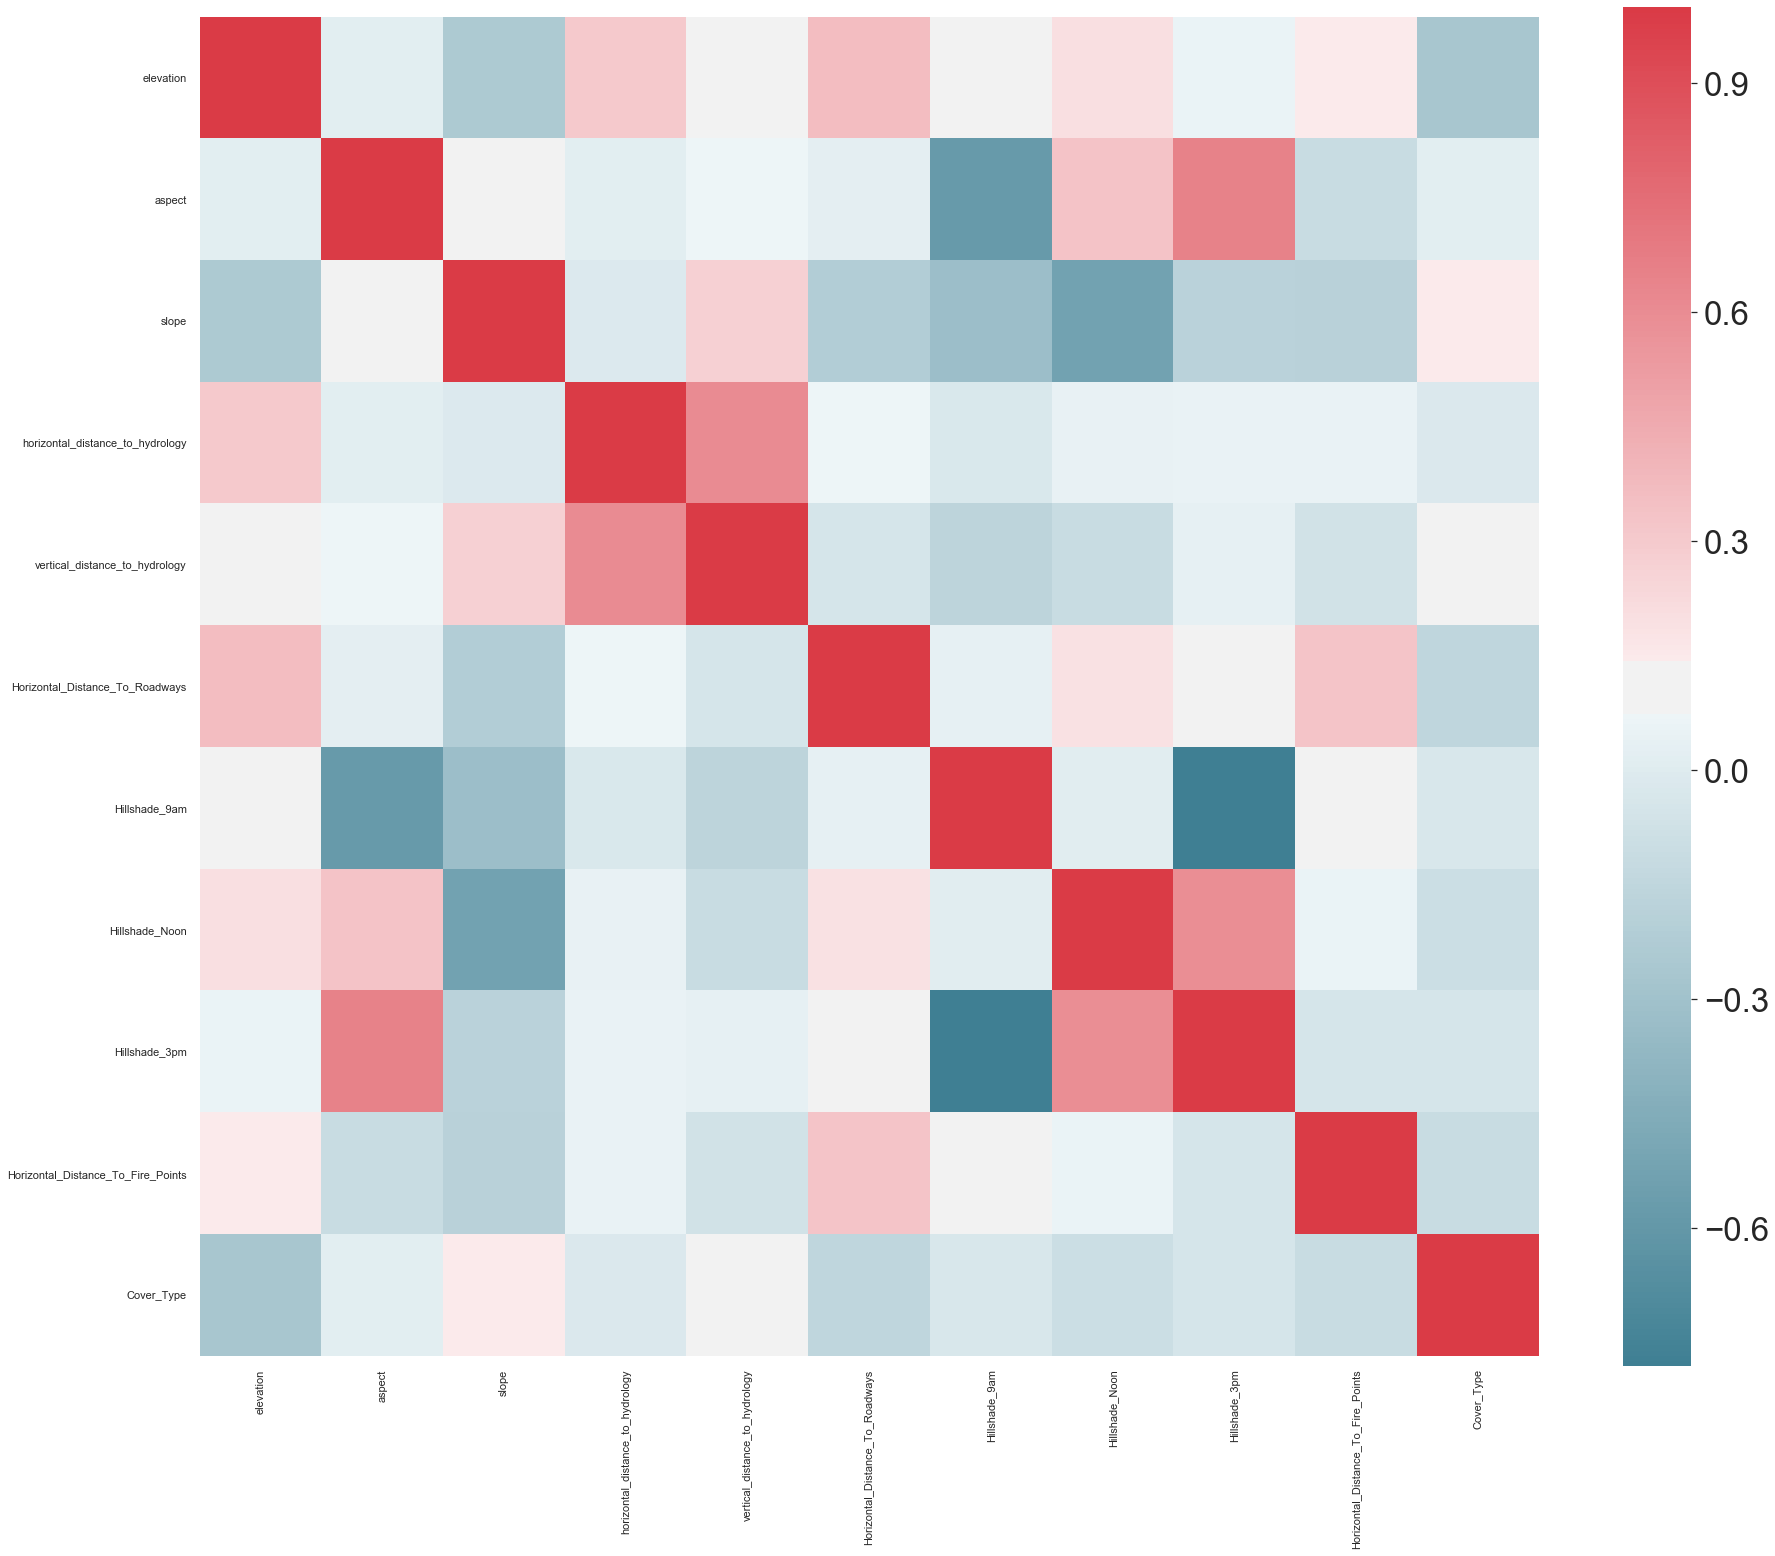

In [102]:
f, ax = plt.subplots(figsize=(30, 25))
#corr = data.corr()
sns.set(font_scale=3)
sns.heatmap(corr, 
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Ensemble Models 

In [103]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_auc_score


def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=RANDOM_STATE)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=RANDOM_STATE)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=RANDOM_STATE)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models

models = get_models()

In [104]:
P = np.zeros((y_test.shape[0], len(models)))
P = pd.DataFrame(P)

P.head()

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
print("Fitting models.")
cols = list()
for i, (name, m) in enumerate(models.items()):
    print("%s..." % name, end=" ", flush=False)
    m.fit(X_train, y_train)
    P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
    cols.append(name)
    print("done")


Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done


In [106]:
P.columns = cols
print("Done.\n")
P

Done.



,svm,knn,naive bayes,mlp-nn,random forest,gbm,logistic
0,0.060118,0.000000,8.282034e-11,0.051992,0.0,0.017651,0.286550
1,0.000126,0.000000,5.228540e-44,0.000267,0.0,0.006693,0.003090
2,0.010427,0.000000,1.913099e-45,0.004951,0.0,0.008639,0.002853
3,0.072753,0.000000,2.821033e-12,0.130805,0.0,0.137321,0.167942
4,0.156275,0.000000,1.687756e-12,0.251495,0.2,0.238639,0.201617
5,0.002979,0.000000,6.945198e-45,0.002447,0.0,0.009021,0.004931
6,0.000726,0.000000,3.730319e-159,0.000072,0.0,0.002446,0.003291
7,0.266077,0.333333,2.996061e-12,0.121353,0.0,0.131449,0.226326
8,0.005029,0.000000,7.426491e-40,0.004233,0.0,0.008405,0.008586
9,0.098510,0.000000,8.648119e-11,0.113514,0.1,0.020925,0.176754


In [107]:
#def score_models(P, y):
#    """Score model in prediction DF"""
#    print("Scoring models.")
#    for m in P.columns:
#        score = roc_auc_score(y, P.loc[:, m])
#        print("%-26s: %.3f" % (m, score))
#    print("Done.\n")
#score_models(P, y_test)

In [108]:
!pip install mlens

[MLENS] backend: threading


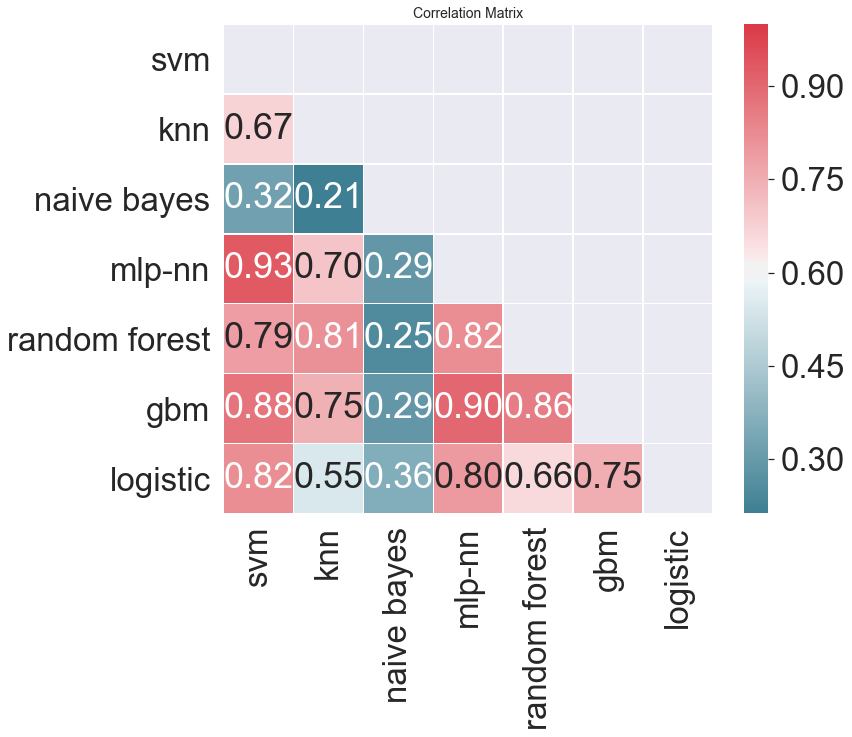

In [109]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

In [110]:
#print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(y_test, P.mean(axis=1)))

In [116]:
from joblib import dump, load


dump(nnest_grid_search, './grid_search_optimal.joblib')

['./grid_search_optimal.joblib']